In [1]:
from pathlib import Path
from sqlalchemy import create_engine
import pandas as pd
import sqlite3
import json
from census import Census

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the use_renew_sector.xlsx excel file 
sheets = ['Contents', 'Biomass', 'Geothermal', 'Hydropower', 'Solar Energy', 'Wind Energy']

renewable_data = pd.read_excel('use_renew_sector.xlsx', sheet_name=sheets, index_col=None, header=2)

In [3]:
biomass = renewable_data['Biomass']
biomass_renewable_energy = biomass[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
biomass_renewable_energy.head()

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,3299,2298,3660,6494,7530,9181,7802,8231,7668,8687
1,AL,193453,194992,213553,203628,192270,194485,198072,196226,193284,187599
2,AR,105562,103550,106124,105604,95088,93707,93283,94536,92332,74385
3,AZ,29754,27209,27187,33300,35397,37709,37953,40107,40871,35235
4,CA,299705,296354,343657,349289,344065,349253,357861,357070,405324,400214


In [4]:
biomass_renewable_energy = biomass_renewable_energy.rename(columns={2011:'2011(BM)',
                                        2012:'2012(BM)',
                                        2013:'2013(BM)',
                                        2014:'2014(BM)',
                                        2015:'2015(BM)',
                                        2016:'2016(BM)',
                                        2017:'2017(BM)',
                                        2018:'2018(BM)',
                                        2019:'2019(BM)',
                                        2020:'2020(BM)'})
biomass_renewable_energy.head()

,State,2011(BM),2012(BM),2013(BM),2014(BM),2015(BM),2016(BM),2017(BM),2018(BM),2019(BM),2020(BM)
0,AK,3299,2298,3660,6494,7530,9181,7802,8231,7668,8687
1,AL,193453,194992,213553,203628,192270,194485,198072,196226,193284,187599
2,AR,105562,103550,106124,105604,95088,93707,93283,94536,92332,74385
3,AZ,29754,27209,27187,33300,35397,37709,37953,40107,40871,35235
4,CA,299705,296354,343657,349289,344065,349253,357861,357070,405324,400214


In [5]:
geothermal = renewable_data['Geothermal']
geothermal_renewable_energy = geothermal[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
geothermal_renewable_energy.head()

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,214,186,186,186,186,186,186,186,186,186
1,AL,135,141,141,141,141,141,141,141,141,141
2,AR,750,808,808,808,808,808,808,808,808,808
3,AZ,345,345,345,345,345,345,345,345,345,345
4,CA,124092,121269,119556,117214,112818,107867,108579,108375,99263,101789


In [6]:
geothermal_renewable_energy = geothermal_renewable_energy.rename(columns={2011:'2011(GT)',
                                        2012:'2012(GT)',
                                        2013:'2013(GT)',
                                        2014:'2014(GT)',
                                        2015:'2015(GT)',
                                        2016:'2016(GT)',
                                        2017:'2017(GT)',
                                        2018:'2018(GT)',
                                        2019:'2019(GT)',
                                        2020:'2020(GT)'})
geothermal_renewable_energy.head()

,State,2011(GT),2012(GT),2013(GT),2014(GT),2015(GT),2016(GT),2017(GT),2018(GT),2019(GT),2020(GT)
0,AK,214,186,186,186,186,186,186,186,186,186
1,AL,135,141,141,141,141,141,141,141,141,141
2,AR,750,808,808,808,808,808,808,808,808,808
3,AZ,345,345,345,345,345,345,345,345,345,345
4,CA,124092,121269,119556,117214,112818,107867,108579,108375,99263,101789


In [7]:
hydropower = renewable_data['Hydropower']
hydropower_renewable_energy = hydropower[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
hydropower_renewable_energy.head()

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,13066,14988,13696,14632,14613,15311,15135,15141,14446,15465
1,AL,86313,70754,123071,90020,91853,64456,85057,101380,101495,117032
2,AR,28738,20921,25329,25102,33243,32944,27102,27374,36795,39720
3,AZ,89135,63918,56432,58179,60874,66144,62908,63524,55213,56316
4,CA,413488,255384,226643,157197,128612,267078,390080,239556,341319,187416


In [8]:
hydropower_renewable_energy = hydropower_renewable_energy.rename(columns={2011:'2011(HP)',
                                        2012:'2012(HP)',
                                        2013:'2013(HP)',
                                        2014:'2014(HP)',
                                        2015:'2015(HP)',
                                        2016:'2016(HP)',
                                        2017:'2017(HP)',
                                        2018:'2018(HP)',
                                        2019:'2019(HP)',
                                        2020:'2020(HP)'})
hydropower_renewable_energy.head()

,State,2011(HP),2012(HP),2013(HP),2014(HP),2015(HP),2016(HP),2017(HP),2018(HP),2019(HP),2020(HP)
0,AK,13066,14988,13696,14632,14613,15311,15135,15141,14446,15465
1,AL,86313,70754,123071,90020,91853,64456,85057,101380,101495,117032
2,AR,28738,20921,25329,25102,33243,32944,27102,27374,36795,39720
3,AZ,89135,63918,56432,58179,60874,66144,62908,63524,55213,56316
4,CA,413488,255384,226643,157197,128612,267078,390080,239556,341319,187416


In [9]:
solar = renewable_data['Solar Energy']
solar_renewable_energy = solar[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
solar_renewable_energy.head()

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,3,3,3,3,3,14,20,28,40,62
1,AL,71,77,98,100,101,431,1811,3423,3625,3437
2,AR,84,98,108,111,124,372,442,2116,2254,3209
3,AZ,7393,17784,31499,43562,48205,52832,66282,70733,73207,80075
4,CA,40964,52660,85168,156446,211736,267428,340183,381368,405353,436394


In [10]:
solar_renewable_energy = solar_renewable_energy.rename(columns={2011:'2011(S)',
                                        2012:'2012(S)',
                                        2013:'2013(S)',
                                        2014:'2014(S)',
                                        2015:'2015(S)',
                                        2016:'2016(S)',
                                        2017:'2017(S)',
                                        2018:'2018(S)',
                                        2019:'2019(S)',
                                        2020:'2020(S)'})
solar_renewable_energy.head()

,State,2011(S),2012(S),2013(S),2014(S),2015(S),2016(S),2017(S),2018(S),2019(S),2020(S)
0,AK,3,3,3,3,3,14,20,28,40,62
1,AL,71,77,98,100,101,431,1811,3423,3625,3437
2,AR,84,98,108,111,124,372,442,2116,2254,3209
3,AZ,7393,17784,31499,43562,48205,52832,66282,70733,73207,80075
4,CA,40964,52660,85168,156446,211736,267428,340183,381368,405353,436394


In [11]:
wind = renewable_data['Wind Energy']
wind_renewable_energy = wind[['State',2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]]
wind_renewable_energy.head()

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AK,121,356,1386,1445,1487,1562,1305,1410,1269,1127
1,AL,0,0,0,0,0,0,0,0,0,0
2,AR,0,0,0,0,0,0,0,0,0,0
3,AZ,2483,5059,4291,4451,4210,4998,5248,4824,4933,5647
4,CA,75317,92821,122335,123546,113906,124661,118074,127590,122228,119083


In [12]:
wind_renewable_energy = wind_renewable_energy.rename(columns={2011:'2011(W)',
                                        2012:'2012(W)',
                                        2013:'2013(W)',
                                        2014:'2014(W)',
                                        2015:'2015(W)',
                                        2016:'2016(W)',
                                        2017:'2017(W)',
                                        2018:'2018(W)',
                                        2019:'2019(W)',
                                        2020:'2020(W)'})
wind_renewable_energy.head()

,State,2011(W),2012(W),2013(W),2014(W),2015(W),2016(W),2017(W),2018(W),2019(W),2020(W)
0,AK,121,356,1386,1445,1487,1562,1305,1410,1269,1127
1,AL,0,0,0,0,0,0,0,0,0,0
2,AR,0,0,0,0,0,0,0,0,0,0
3,AZ,2483,5059,4291,4451,4210,4998,5248,4824,4933,5647
4,CA,75317,92821,122335,123546,113906,124661,118074,127590,122228,119083


In [13]:
merge1 = pd.merge(biomass_renewable_energy, geothermal_renewable_energy)
merge1.head()

,State,2011(BM),2012(BM),2013(BM),2014(BM),2015(BM),2016(BM),2017(BM),2018(BM),2019(BM),...,2011(GT),2012(GT),2013(GT),2014(GT),2015(GT),2016(GT),2017(GT),2018(GT),2019(GT),2020(GT)
0,AK,3299,2298,3660,6494,7530,9181,7802,8231,7668,...,214,186,186,186,186,186,186,186,186,186
1,AL,193453,194992,213553,203628,192270,194485,198072,196226,193284,...,135,141,141,141,141,141,141,141,141,141
2,AR,105562,103550,106124,105604,95088,93707,93283,94536,92332,...,750,808,808,808,808,808,808,808,808,808
3,AZ,29754,27209,27187,33300,35397,37709,37953,40107,40871,...,345,345,345,345,345,345,345,345,345,345
4,CA,299705,296354,343657,349289,344065,349253,357861,357070,405324,...,124092,121269,119556,117214,112818,107867,108579,108375,99263,101789


In [14]:
merge2 = pd.merge(merge1, hydropower_renewable_energy)
merge2.head()

,State,2011(BM),2012(BM),2013(BM),2014(BM),2015(BM),2016(BM),2017(BM),2018(BM),2019(BM),...,2011(HP),2012(HP),2013(HP),2014(HP),2015(HP),2016(HP),2017(HP),2018(HP),2019(HP),2020(HP)
0,AK,3299,2298,3660,6494,7530,9181,7802,8231,7668,...,13066,14988,13696,14632,14613,15311,15135,15141,14446,15465
1,AL,193453,194992,213553,203628,192270,194485,198072,196226,193284,...,86313,70754,123071,90020,91853,64456,85057,101380,101495,117032
2,AR,105562,103550,106124,105604,95088,93707,93283,94536,92332,...,28738,20921,25329,25102,33243,32944,27102,27374,36795,39720
3,AZ,29754,27209,27187,33300,35397,37709,37953,40107,40871,...,89135,63918,56432,58179,60874,66144,62908,63524,55213,56316
4,CA,299705,296354,343657,349289,344065,349253,357861,357070,405324,...,413488,255384,226643,157197,128612,267078,390080,239556,341319,187416


In [15]:
merge3 = pd.merge(merge2, solar_renewable_energy)
merge3.head()

,State,2011(BM),2012(BM),2013(BM),2014(BM),2015(BM),2016(BM),2017(BM),2018(BM),2019(BM),...,2011(S),2012(S),2013(S),2014(S),2015(S),2016(S),2017(S),2018(S),2019(S),2020(S)
0,AK,3299,2298,3660,6494,7530,9181,7802,8231,7668,...,3,3,3,3,3,14,20,28,40,62
1,AL,193453,194992,213553,203628,192270,194485,198072,196226,193284,...,71,77,98,100,101,431,1811,3423,3625,3437
2,AR,105562,103550,106124,105604,95088,93707,93283,94536,92332,...,84,98,108,111,124,372,442,2116,2254,3209
3,AZ,29754,27209,27187,33300,35397,37709,37953,40107,40871,...,7393,17784,31499,43562,48205,52832,66282,70733,73207,80075
4,CA,299705,296354,343657,349289,344065,349253,357861,357070,405324,...,40964,52660,85168,156446,211736,267428,340183,381368,405353,436394


In [16]:
all_renewables = pd.merge(merge3, wind_renewable_energy)
all_renewables.head()

,State,2011(BM),2012(BM),2013(BM),2014(BM),2015(BM),2016(BM),2017(BM),2018(BM),2019(BM),...,2011(W),2012(W),2013(W),2014(W),2015(W),2016(W),2017(W),2018(W),2019(W),2020(W)
0,AK,3299,2298,3660,6494,7530,9181,7802,8231,7668,...,121,356,1386,1445,1487,1562,1305,1410,1269,1127
1,AL,193453,194992,213553,203628,192270,194485,198072,196226,193284,...,0,0,0,0,0,0,0,0,0,0
2,AR,105562,103550,106124,105604,95088,93707,93283,94536,92332,...,0,0,0,0,0,0,0,0,0,0
3,AZ,29754,27209,27187,33300,35397,37709,37953,40107,40871,...,2483,5059,4291,4451,4210,4998,5248,4824,4933,5647
4,CA,299705,296354,343657,349289,344065,349253,357861,357070,405324,...,75317,92821,122335,123546,113906,124661,118074,127590,122228,119083


In [17]:
all_energy = pd.read_csv('Energy Consumption By Type 2011-2020.csv', index_col=None)
all_energy = all_energy.drop(columns='Unnamed: 0')
all_energy.head()

,State,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),...,2011(TR),2012(TR),2013(TR),2014(TR),2015(TR),2016(TR),2017(TR),2018(TR),2019(TR),2020(TR)
0,AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,...,16702,17831,18931,22760,23819,26254,24447,24996,23608,25527
1,AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,...,279972,265964,336863,293890,284365,259513,285081,301170,298545,308209
2,AR,306119,296732,327099,339214,226889,246437,267591,304145,239798,...,135133,125377,132370,131625,129264,127831,121635,124834,132189,118123
3,AZ,459909,420570,454865,447849,385822,323878,334512,331492,257727,...,129110,114315,119753,139836,149031,162028,172736,179533,174570,177618
4,CA,55264,43832,38151,39486,30967,32077,33663,33256,30886,...,953565,818490,897358,903692,911138,1116287,1314777,1213958,1373488,1244897


In [18]:
all_energy_plus_all_renewables = pd.merge(all_energy, all_renewables)
all_energy_plus_all_renewables.head()

,State,2011(C),2012(C),2013(C),2014(C),2015(C),2016(C),2017(C),2018(C),2019(C),...,2011(W),2012(W),2013(W),2014(W),2015(W),2016(W),2017(W),2018(W),2019(W),2020(W)
0,AK,15481,15521,14819,18225,19511,16613,16376,17325,17620,...,121,356,1386,1445,1487,1562,1305,1410,1269,1127
1,AL,651032,547004,565051,575912,494311,410168,378890,377152,317180,...,0,0,0,0,0,0,0,0,0,0
2,AR,306119,296732,327099,339214,226889,246437,267591,304145,239798,...,0,0,0,0,0,0,0,0,0,0
3,AZ,459909,420570,454865,447849,385822,323878,334512,331492,257727,...,2483,5059,4291,4451,4210,4998,5248,4824,4933,5647
4,CA,55264,43832,38151,39486,30967,32077,33663,33256,30886,...,75317,92821,122335,123546,113906,124661,118074,127590,122228,119083


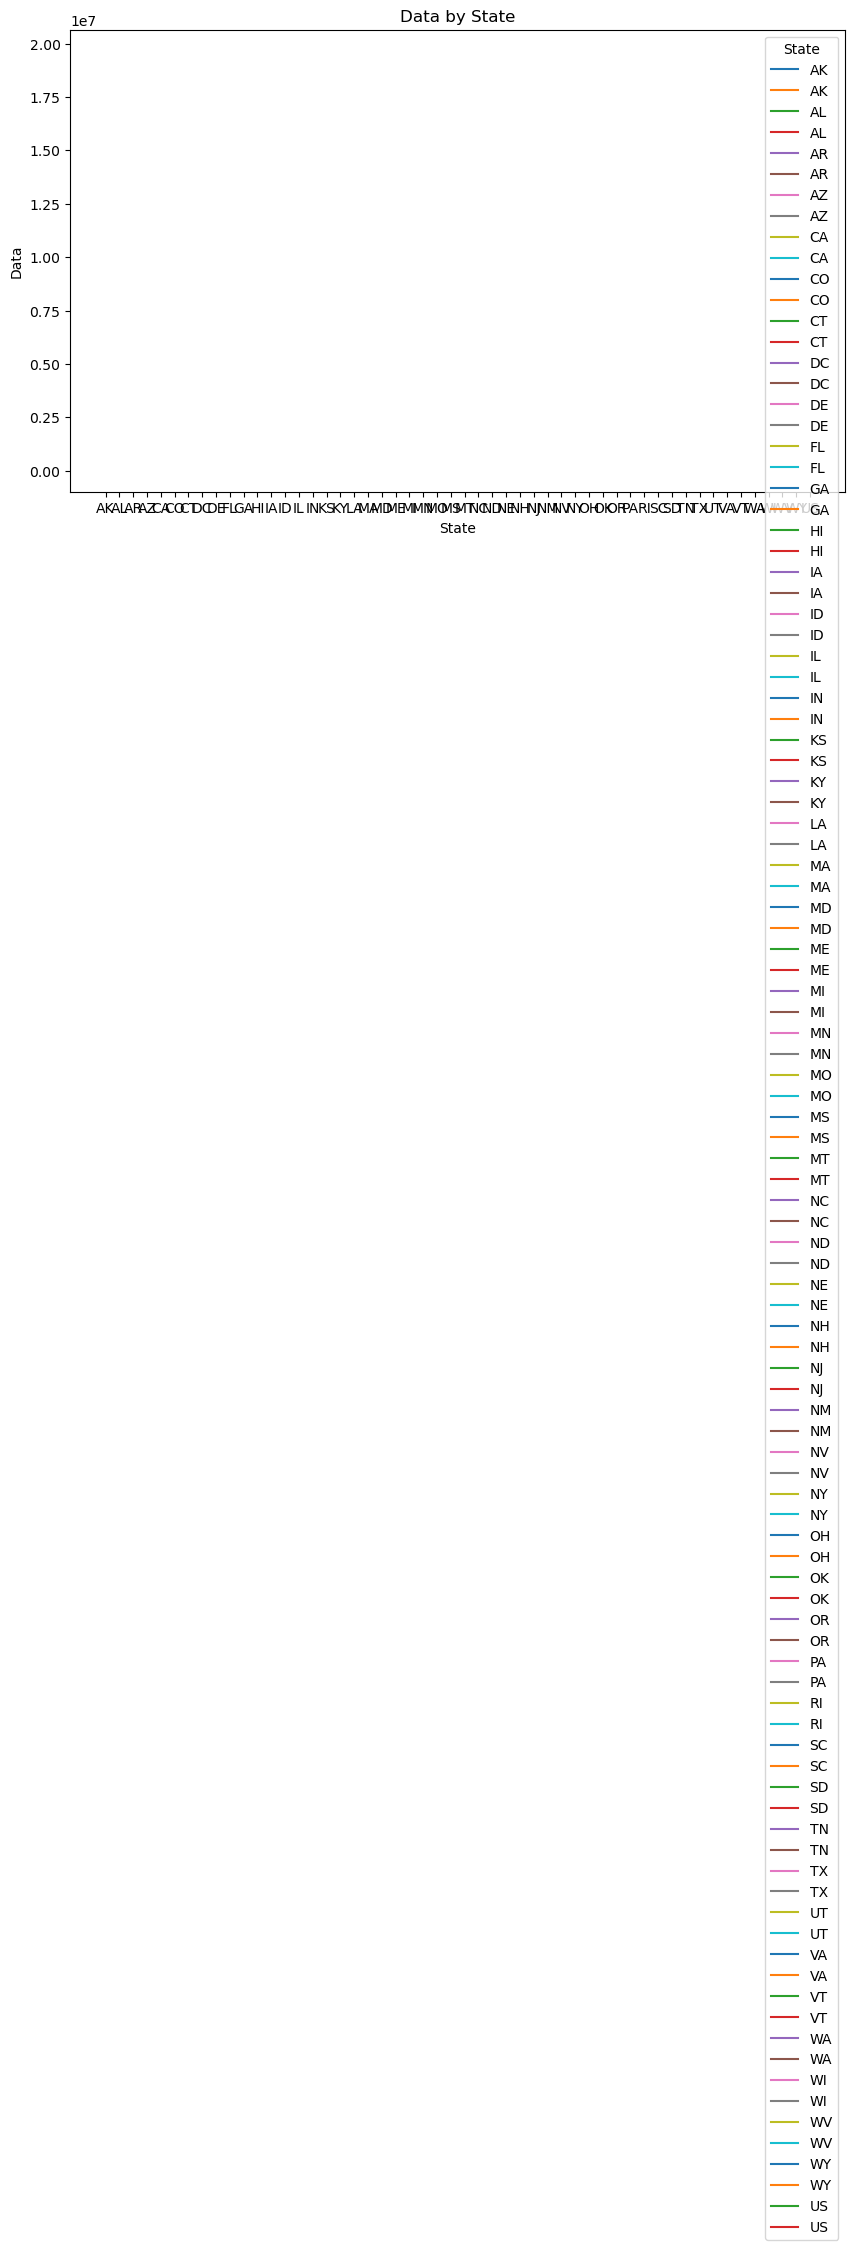

In [20]:
# Select all States' info
states = all_energy_plus_all_renewables['State'].unique()

# Create a graph based upon the list and array we have created
plt.figure(figsize=(10, 6))
for state in states:
    state_data = all_energy_plus_all_renewables[all_energy_plus_all_renewables['State'] == state]
    plt.plot(state_data['State'], state_data[['2011(C)', '2012(C)']], label=state)
    
# Set labels and legend
plt.xlabel('State')
plt.ylabel('Data')
plt.title('Data by State')
plt.legend(title='State')

# Set x-axis labels to state names
plt.xticks(states)

# Show the graph that we have created
plt.show()

In [ ]:
# Select all States' info
states = all_energy_plus_all_renewables['State'].unique()

# Create a graph based upon the list and array we have created
coal_stats = ['2011(C)', '2012(C)','2013(C)','2014(C)','2015(C)','2016(C)','2017(C)','2018(C)','2019(C)', '2020(C)']
plt.plot('State', coal_stats)
# Show the graph that we have created
plt.show()

In [ ]:
# Export the 'energy_data_totals_df' and the 'grouped_renewables_df' as CSV files
all_renewables.to_csv('renewable_energy_2011_2020.csv', sep=',', index=True, encoding='utf-8')
all_energy_plus_all_renewables.to_csv('all_energy_plus_all_renewables.csv', sep=',', index=True, encoding='utf-8')